In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
ni_wt = pd.read_csv('Ni_Wt_pct.csv', header = None).dropna(axis = 1).to_numpy()
ni_at = pd.read_csv('Ni At.csv', header = None).dropna(axis = 1).to_numpy()
al_wt = pd.read_csv('Al_Wt_pct.csv', header = None).dropna(axis = 1).to_numpy()
al_at = pd.read_csv('Al At.csv', header = None).dropna(axis = 1).to_numpy()

In [3]:
wt_at = []
for i in range(len(ni_at)):
    concat = np.concatenate([ni_wt[i][:,None], ni_at[i][:,None], al_wt[i][:,None], 
                             al_at[i][:,None]], axis = 1)
    wt_at.append(concat)

In [4]:
wt_at = np.array(wt_at)

length = wt_at.shape[0]
width = wt_at.shape[1]
dims = wt_at.shape[2]

wt_at = wt_at.reshape(length * width, dims)
wt_at.shape

(6900, 4)

In [6]:
# min_samples: usually determined by domain knowledge which we lack
# for larger datasets with noise, recommended 2 * dims

# eps: most important parameter for DBSCAN function
# Per suggestion:
# we have min_samples = 2 * 10
# 1. Compute distance of 20th nearest neighbor for every point in data set
# 2. Sort distances in descending order
# 3. Plot and use the distance corresponding to the "elbow" for epsilon

# Code from link above
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

min_samples = 2 * dims

neighbors = NearestNeighbors(n_neighbors = min_samples).fit(wt_at)
distances, indices = neighbors.kneighbors(wt_at)
num_samples = distances.size
distance_desc = sorted(distances[:,min_samples - 1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc)

In [7]:
# Finding the knee
# Code also from link above

from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

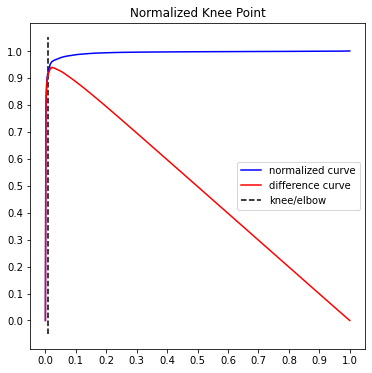

In [8]:
kneedle.plot_knee_normalized()

In [9]:
# Optimal value for epsilon

eps = kneedle.knee_y
eps

0.10123208285914496

In [131]:
min_samples = 22
clusters = DBSCAN(eps = eps, min_samples = min_samples).fit(wt_at)

In [132]:
labels = clusters.labels_.reshape(length, width)

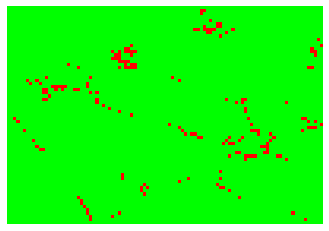

In [155]:
colors = 'lime red'.split()
cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

plt.imshow(labels, cmap=cmap)
plt.axis('off')
plt.show()